In [1]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# II.EDA

In [3]:
df=pd.read_csv('../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')

In [4]:
df.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [5]:
df.shape  

(5910, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [7]:
df['Dataset_type'].value_counts()

TRAIN    5286
TEST      624
Name: Dataset_type, dtype: int64

In [8]:
train_df=df[df['Dataset_type']=='TRAIN']
test_df=df[df['Dataset_type']=='TEST']
print('train_shape :',train_df.shape)
print('test_shape :',test_df.shape)
train_df=train_df[['X_ray_image_name','Label','Label_2_Virus_category','Label_1_Virus_category']]
test_df=test_df[['X_ray_image_name','Label','Label_2_Virus_category','Label_1_Virus_category']]

train_shape : (5286, 6)
test_shape : (624, 6)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5286 entries, 0 to 5285
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   X_ray_image_name        5286 non-null   object
 1   Label                   5286 non-null   object
 2   Label_2_Virus_category  69 non-null     object
 3   Label_1_Virus_category  3944 non-null   object
dtypes: object(4)
memory usage: 206.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 5286 to 5909
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   X_ray_image_name        624 non-null    object
 1   Label                   624 non-null    object
 2   Label_2_Virus_category  0 non-null      object
 3   Label_1_Virus_category  390 non-null    object
dtypes: object(4)
memory usage: 24.4+ KB


In [11]:
train_df.describe()

,X_ray_image_name,Label,Label_2_Virus_category,Label_1_Virus_category
count,5286,5286,69,3944
unique,5286,2,4,3
top,IM-0128-0001.jpeg,Pnemonia,COVID-19,bacteria
freq,1,3944,58,2535


<AxesSubplot:>

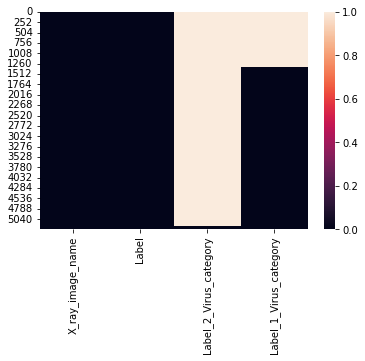

In [12]:
sns.heatmap(train_df.isna())

## 1.INTO 'Label':

In [13]:
label_df=train_df['Label'].copy()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Pnemonia    3944
Normal      1342
Name: Label, dtype: int64


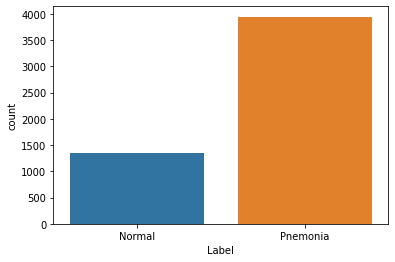

In [14]:
sns.countplot(label_df)
print(label_df.value_counts(dropna=False))

In [15]:
label_df.value_counts(dropna=False).index

Index(['Pnemonia', 'Normal'], dtype='object')

([<matplotlib.patches.Wedge at 0x7fd034d06290>,
 [Text(-0.7682833087364032, 0.7872361510481113, 'Pnemonia'),
  Text(0.768283308736403, -0.7872361510481114, 'Normal')],
 [Text(-0.41906362294712896, 0.4294015369353334, '74.6%'),
  Text(0.4190636229471289, -0.42940153693533345, '25.4%')])

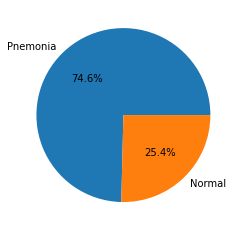

In [16]:
plt.pie(x=label_df.value_counts(dropna=False),labels=label_df.value_counts(dropna=False).index,autopct='%1.1f%%')

## 2.INTO 'Label_1_Virus_category':

In [17]:
label1_df=train_df['Label_1_Virus_category'].copy()

bacteria          2535
Virus             1407
NaN               1342
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


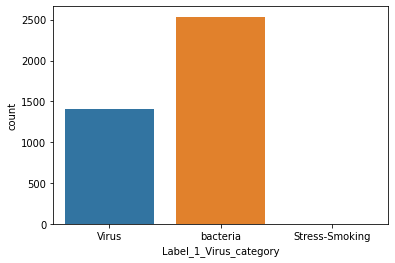

In [18]:
sns.countplot(label1_df)
print(label1_df.value_counts(dropna=False))

([<matplotlib.patches.Wedge at 0x7fd034c3ef90>,
 [Text(0.07055716938348751, 1.0977347975939316, 'bacteria'),
  Text(-0.8357456734753231, -0.7152126741517371, 'Virus'),
  Text(0.7664095872805778, -0.7890604188048052, 'nan'),
  Text(1.0999992228142623, -0.0013075962752645842, 'Stress-Smoking')],
 [Text(0.03848572875462955, 0.5987644350512353, '47.96%'),
  Text(-0.4558612764410853, -0.39011600408276564, '26.62%'),
  Text(0.41804159306213334, -0.4303965920753482, '25.39%'),
  Text(0.5999995760805067, -0.0007132343319625003, '0.04%')])

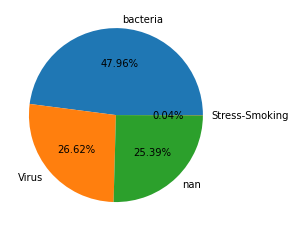

In [19]:
plt.pie(x=label1_df.value_counts(dropna=False),labels=label1_df.value_counts(dropna=False).index,autopct='%1.2f%%')

## 3.INTO 'Label_2_Virus_category':

In [20]:
label2_df=train_df['Label_2_Virus_category'].copy()

NaN              5217
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


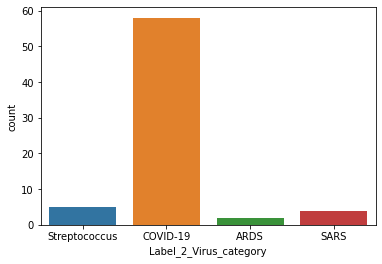

In [21]:
sns.countplot(label2_df)
print(label2_df.value_counts(dropna=False))

([<matplotlib.patches.Wedge at 0x7fd034b34e90>,
 [Text(-1.0990752037851734, 0.045096523420103875, 'nan'),
  Text(1.0987568963741297, -0.05228080594530238, 'COVID-19'),
  Text(1.099943855490593, -0.011113719831349504, 'Streptococcus'),
  Text(1.0999875663690692, -0.005230089239470279, 'SARS'),
  Text(1.0999992228391298, -0.0013075753555511036, 'ARDS')],
 [Text(-0.5994955657010036, 0.02459810368369302, '98.7%'),
  Text(0.5993219434767979, -0.028516803242892203, '1.1%'),
  Text(0.5999693757221416, -0.006062028998917911, '0.1%'),
  Text(0.5999932180194922, -0.00285277594880197, '0.1%'),
  Text(0.5999995760940707, -0.0007132229212096927, '0.0%')])

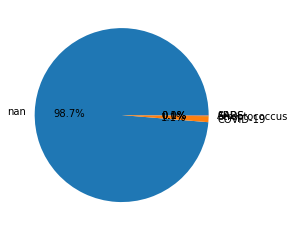

In [22]:
plt.pie(x=label2_df.value_counts(dropna=False),labels=label2_df.value_counts(dropna=False).index,autopct='%1.1f%%')

## 4. Label2 x Label :(groupby) 

In [23]:
Label2_x_Label=train_df['Label_2_Virus_category'].groupby(train_df['Label'])
Label2_x_Label.value_counts(dropna=False)

Label     Label_2_Virus_category
Normal    NaN                       1342
Pnemonia  NaN                       3875
          COVID-19                    58
          Streptococcus                5
          SARS                         4
          ARDS                         2
Name: Label_2_Virus_category, dtype: int64

#### Observation:
##### 3875 values for Pnemonia without Lable Virus category.
##### we have 1342 nan values for Normal in feature Label_2_Virus_category.

## 5. Label1 x Label :(groupby)

In [24]:
Label1_x_Label=train_df['Label_1_Virus_category'].groupby(train_df['Label'])
Label1_x_Label.value_counts(dropna=False)

Label     Label_1_Virus_category
Normal    NaN                       1342
Pnemonia  bacteria                  2535
          Virus                     1407
          Stress-Smoking               2
Name: Label_1_Virus_category, dtype: int64

## 6. Label1 x Label2 :(groupby)

In [25]:
Label1_x_Label2=train_df['Label_1_Virus_category'].groupby(train_df['Label_2_Virus_category'])
Label1_x_Label2.value_counts(dropna=False)

Label_2_Virus_category  Label_1_Virus_category
ARDS                    Stress-Smoking             2
COVID-19                Virus                     58
SARS                    Virus                      4
Streptococcus           bacteria                   5
Name: Label_1_Virus_category, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label_1_Virus_category', ylabel='count'>

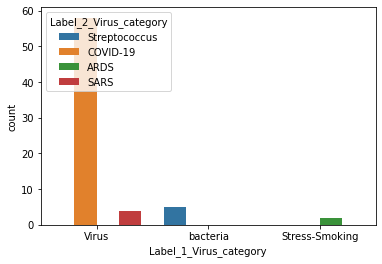

In [26]:
sns.countplot(train_df['Label_1_Virus_category'],hue=train_df['Label_2_Virus_category'])

## 7. Label x Label1 x Label2 :(groupby)

In [27]:
train_df[['Label','Label_1_Virus_category','Label_2_Virus_category']].value_counts(dropna=False)

Label     Label_1_Virus_category  Label_2_Virus_category
Pnemonia  bacteria                NaN                       2530
          Virus                   NaN                       1345
Normal    NaN                     NaN                       1342
Pnemonia  Virus                   COVID-19                    58
          bacteria                Streptococcus                5
          Virus                   SARS                         4
          Stress-Smoking          ARDS                         2
dtype: int64

In [28]:
pnemonia_df=train_df[train_df['Label']=='Pnemonia']
pnemonia_df.shape

(3944, 4)

In [29]:
pnemonia_df[['Label','Label_1_Virus_category','Label_2_Virus_category']].value_counts(dropna=False)

Label     Label_1_Virus_category  Label_2_Virus_category
Pnemonia  bacteria                NaN                       2530
          Virus                   NaN                       1345
                                  COVID-19                    58
          bacteria                Streptococcus                5
          Virus                   SARS                         4
          Stress-Smoking          ARDS                         2
dtype: int64

### 7.1 Into 'bacteria':

NaN              2530
Streptococcus       5
Name: Label_2_Virus_category, dtype: int64


([<matplotlib.patches.Wedge at 0x7fd0349e5ad0>,
 [Text(-1.0999788825712942, 0.006816003022829919, 'nan'),
  Text(1.0999788827707186, -0.0068159708392502485, 'Streptococcus')],
 [Text(-0.599988481402524, 0.0037178198306345002, '99.80%'),
  Text(0.599988481511301, -0.0037178022759546806, '0.20%')])

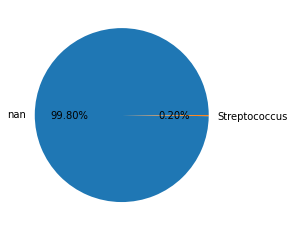

In [30]:
bacterai_df=pnemonia_df[pnemonia_df['Label_1_Virus_category']=='bacteria']
bacteria_count=bacterai_df['Label_2_Virus_category'].value_counts(dropna=False)
print(bacteria_count)
plt.pie(bacteria_count,labels=bacteria_count.index,autopct='%1.2f%%')

#### Observation:
##### 99.80 % of bactria are unlabel.

### 7.2 Into 'Virus':

NaN         1345
COVID-19      58
SARS           4
Name: Label_2_Virus_category, dtype: int64


([<matplotlib.patches.Wedge at 0x7fd0349c95d0>,
 [Text(-1.0894763962509226, 0.15179322123238273, 'nan'),
  Text(1.088077233668587, -0.16151759524000708, 'COVID-19'),
  Text(1.0999561259365054, -0.0098245109168356, 'SARS')],
 [Text(-0.5942598525005032, 0.08279630249039056, '95.59%'),
  Text(0.5934966729101384, -0.0881005064945493, '4.12%'),
  Text(0.5999760686926392, -0.0053588241364557814, '0.28%')])

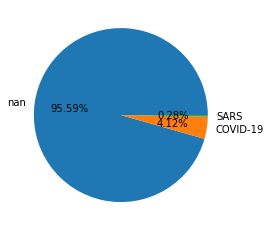

In [31]:
virus_df=pnemonia_df[pnemonia_df['Label_1_Virus_category']=='Virus']
virus_count=virus_df['Label_2_Virus_category'].value_counts(dropna=False)
print(virus_count)
plt.pie(virus_count,labels=virus_count.index,autopct='%1.2f%%')

#### Observation:
##### 95.59 % of Virus are unlabel.

<AxesSubplot:>

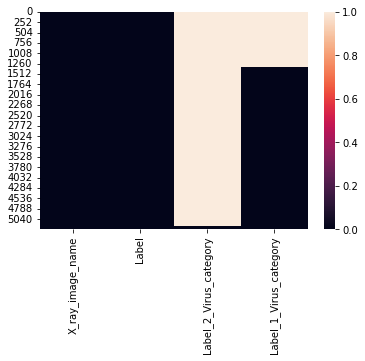

In [32]:
sns.heatmap(train_df.isna())

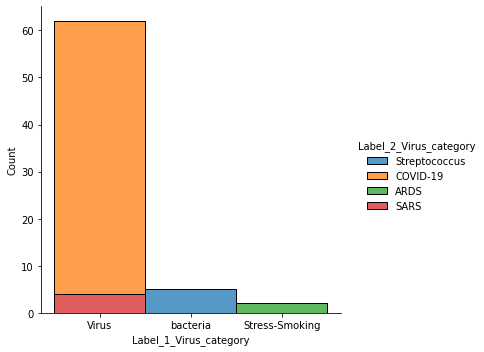

In [33]:
sns.displot(x=train_df['Label_1_Virus_category'],hue=train_df['Label_2_Virus_category'],multiple="stack")

#### Observation :
##### - We see that SARS and COVID-19 are Virus.
##### - We see that Streptococcus is a bacteria.
##### - We see that ARDS is a Stress-Smoking.

##### .
##### - We have 5 groups:
#####    *G1: "Normal"
#####    *G2: "Covid-19"      (penemonia /virus)
#####    *G3: "SARS"          (penemonia /virus)
#####    *G4: "Streptococcus" (penemonia / bacteria )
#####    *G5: "ARDS"          (penemonia / Stress-Smoking)




In [34]:
train_df['Label_2_Virus_category'].unique()

array([nan, 'Streptococcus', 'COVID-19', 'ARDS', 'SARS'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fd034723090>,
 [Text(-0.7682833087364032, 0.7872361510481113, 'Pnemonia'),
  Text(0.768283308736403, -0.7872361510481114, 'Normal')],
 [Text(-0.41906362294712896, 0.4294015369353334, '74.6%'),
  Text(0.4190636229471289, -0.42940153693533345, '25.4%')])

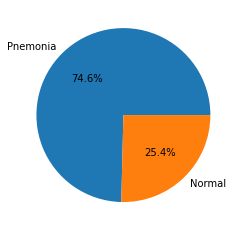

In [35]:
values=train_df['Label'].value_counts()
plt.pie(values,labels=values.index,autopct='%1.1f%%')

In [36]:
train_df['Label'].value_counts()

Pnemonia    3944
Normal      1342
Name: Label, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd0346fa590>,
 [Text(0.07055716938348751, 1.0977347975939316, 'bacteria'),
  Text(-0.8357456734753231, -0.7152126741517371, 'Virus'),
  Text(0.7664095872805778, -0.7890604188048052, 'nan'),
  Text(1.0999992228142623, -0.0013075962752645842, 'Stress-Smoking')],
 [Text(0.03848572875462955, 0.5987644350512353, '48.0%'),
  Text(-0.4558612764410853, -0.39011600408276564, '26.6%'),
  Text(0.41804159306213334, -0.4303965920753482, '25.4%'),
  Text(0.5999995760805067, -0.0007132343319625003, '0.0%')])

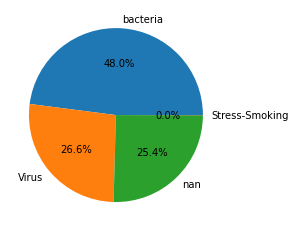

In [37]:
values=train_df['Label_1_Virus_category'].value_counts(dropna=False)
plt.pie(values,labels=values.index,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fd0346c6d50>,
 [Text(-0.9649008268087279, 0.5281726937506647, 'COVID-19'),
  Text(0.7866203414173456, -0.7689138043164907, 'Streptococcus'),
  Text(1.0278331631843964, -0.39186603407077525, 'SARS'),
  Text(1.0954425125670169, -0.10002850424184806, 'ARDS')],
 [Text(-0.5263095418956697, 0.2880941965912716, '84.1%'),
  Text(0.42906564077309756, -0.4194075296271767, '7.2%'),
  Text(0.5606362708278526, -0.21374510949315012, '5.8%'),
  Text(0.5975140977638274, -0.054561002313735306, '2.9%')])

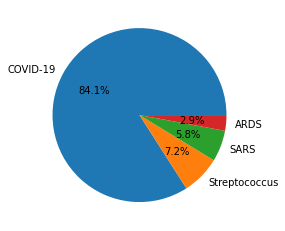

In [38]:
values=train_df['Label_2_Virus_category'].value_counts()
plt.pie(values,labels=values.index,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fd03463c990>,
 [Text(-1.0990752037851734, 0.045096523420103875, 'nan'),
  Text(1.0987568963741297, -0.05228080594530238, 'COVID-19'),
  Text(1.099943855490593, -0.011113719831349504, 'Streptococcus'),
  Text(1.0999875663690692, -0.005230089239470279, 'SARS'),
  Text(1.0999992228391298, -0.0013075753555511036, 'ARDS')],
 [Text(-0.5994955657010036, 0.02459810368369302, '98.7%'),
  Text(0.5993219434767979, -0.028516803242892203, '1.1%'),
  Text(0.5999693757221416, -0.006062028998917911, '0.1%'),
  Text(0.5999932180194922, -0.00285277594880197, '0.1%'),
  Text(0.5999995760940707, -0.0007132229212096927, '0.0%')])

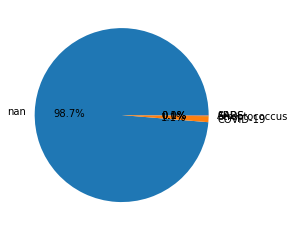

In [39]:
values=train_df['Label_2_Virus_category'].value_counts(dropna=False)
plt.pie(values,labels=values.index,autopct='%1.1f%%')

In [40]:
train_df['Label_2_Virus_category'].value_counts()

COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64

# III.Feature Engineering:

## 1.Imputation and Feature Sealaction :

In [41]:
def imputation_and_feature_selection(df):
  df=df.copy()
  df['label_group']=df['Label_2_Virus_category'].copy()
  df['label_group']=df['label_group'].map({'Streptococcus':'Other_penemonia','SARS':'Other_penemonia','ARDS':'Other_penemonia','COVID-19':'COVID-19'})
  df['label_group']=df['label_group'].fillna('Normal')
  print(df['label_group'].value_counts())
  df.drop(['Label','Label_2_Virus_category','Label_1_Virus_category'],axis=1,inplace=True)
  print('columns: ',df.columns)
  return df


In [42]:
final_train_df=imputation_and_feature_selection(train_df)

Normal             5217
COVID-19             58
Other_penemonia      11
Name: label_group, dtype: int64
columns:  Index(['X_ray_image_name', 'label_group'], dtype='object')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label_group', ylabel='count'>

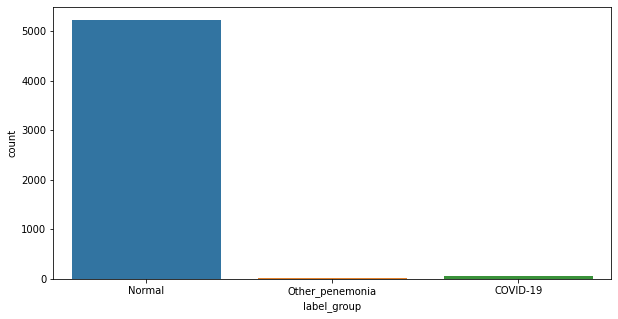

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(final_train_df['label_group'])

## 2.Encoding: 

In [44]:
def OneHotEncoding(df):
  ohe=pd.get_dummies(df['label_group'])
  enc_df=pd.concat([final_train_df,ohe],axis=1)
  print(enc_df[enc_df['label_group']=='COVID-19'].head())
  return enc_df


In [45]:
final_df=OneHotEncoding(final_train_df)

              X_ray_image_name label_group  COVID-19  Normal  Other_penemonia
5221   kjr-21-e25-g001-l-a.jpg    COVID-19         1       0                0
5222   kjr-21-e24-g003-l-a.jpg    COVID-19         1       0                0
5223   kjr-21-e24-g002-l-a.jpg    COVID-19         1       0                0
5224   kjr-21-e24-g001-l-a.jpg    COVID-19         1       0                0
5225  jkms-35-e79-g001-l-c.jpg    COVID-19         1       0                0


In [46]:
y_df=final_df[['COVID-19','Normal','Other_penemonia']]
y=y_df.values
y=y.astype(int)
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

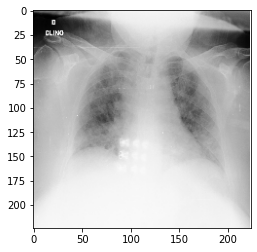

In [47]:
img=load_img('../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',target_size=(224,224,3))
plt.imshow(img)

In [48]:
np.array(img).shape

(224, 224, 3)

In [49]:
final_df.head()

,X_ray_image_name,label_group,COVID-19,Normal,Other_penemonia
0,IM-0128-0001.jpeg,Normal,0,1,0
1,IM-0127-0001.jpeg,Normal,0,1,0
2,IM-0125-0001.jpeg,Normal,0,1,0
3,IM-0122-0001.jpeg,Normal,0,1,0
4,IM-0119-0001.jpeg,Normal,0,1,0


In [50]:
X_ray_image_names=final_df['X_ray_image_name'].values
X_ray_image_names[:10]

array(['IM-0128-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0125-0001.jpeg',
       'IM-0122-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0117-0001.jpeg',
       'IM-0115-0001.jpeg', 'IM-0189-0001.jpeg', 'IM-0187-0001.jpeg',
       'IM-0185-0001.jpeg'], dtype=object)

In [51]:
final_df[final_df['label_group']=='COVID-19'].index

Int64Index([5221, 5222, 5223, 5224, 5225, 5226, 5227, 5228, 5229, 5230, 5237,
            5238, 5239, 5240, 5242, 5243, 5244, 5245, 5246, 5247, 5248, 5249,
            5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258, 5259, 5260,
            5261, 5262, 5263, 5264, 5265, 5266, 5267, 5268, 5269, 5270, 5271,
            5272, 5273, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5281, 5282,
            5283, 5284, 5285],
           dtype='int64')

In [52]:
covid_df=final_df[final_df['label_group']=='COVID-19'].copy()
covid_df.head()

,X_ray_image_name,label_group,COVID-19,Normal,Other_penemonia
5221,kjr-21-e25-g001-l-a.jpg,COVID-19,1,0,0
5222,kjr-21-e24-g003-l-a.jpg,COVID-19,1,0,0
5223,kjr-21-e24-g002-l-a.jpg,COVID-19,1,0,0
5224,kjr-21-e24-g001-l-a.jpg,COVID-19,1,0,0
5225,jkms-35-e79-g001-l-c.jpg,COVID-19,1,0,0


In [53]:
final_df[final_df['label_group']=='Normal'].index[:100]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [54]:
normal_df=final_df[final_df['label_group']=='Normal'][:50].copy()
normal_df.head()

,X_ray_image_name,label_group,COVID-19,Normal,Other_penemonia
0,IM-0128-0001.jpeg,Normal,0,1,0
1,IM-0127-0001.jpeg,Normal,0,1,0
2,IM-0125-0001.jpeg,Normal,0,1,0
3,IM-0122-0001.jpeg,Normal,0,1,0
4,IM-0119-0001.jpeg,Normal,0,1,0


In [55]:
final_df[final_df['label_group']=='Other_penemonia'].index

Int64Index([5216, 5217, 5218, 5219, 5220, 5231, 5232, 5233, 5234, 5235, 5236], dtype='int64')

In [56]:
other_df=final_df[final_df['label_group']=='Other_penemonia'].copy()
other_df.head()

,X_ray_image_name,label_group,COVID-19,Normal,Other_penemonia
5216,streptococcus-pneumoniae-pneumonia-temporal-ev...,Other_penemonia,0,0,1
5217,streptococcus-pneumoniae-pneumonia-temporal-ev...,Other_penemonia,0,0,1
5218,streptococcus-pneumoniae-pneumonia-temporal-ev...,Other_penemonia,0,0,1
5219,streptococcus-pneumoniae-pneumonia-temporal-ev...,Other_penemonia,0,0,1
5220,streptococcus-pneumoniae-pneumonia-1.jpg,Other_penemonia,0,0,1


In [57]:
mini_df=pd.concat([covid_df,normal_df,other_df],axis=0)
mini_df.head()

,X_ray_image_name,label_group,COVID-19,Normal,Other_penemonia
5221,kjr-21-e25-g001-l-a.jpg,COVID-19,1,0,0
5222,kjr-21-e24-g003-l-a.jpg,COVID-19,1,0,0
5223,kjr-21-e24-g002-l-a.jpg,COVID-19,1,0,0
5224,kjr-21-e24-g001-l-a.jpg,COVID-19,1,0,0
5225,jkms-35-e79-g001-l-c.jpg,COVID-19,1,0,0


([<matplotlib.patches.Wedge at 0x7fd034459410>,
 [Text(0.04354851167455959, 1.0991376288395056, 'COVID-19'),
  Text(-0.35644650771729275, -1.0406468599559344, 'Normal'),
  Text(1.0539425864759335, -0.3149682911221697, 'Other_penemonia')],
 [Text(0.02375373364066886, 0.5995296157306393, '48.7%'),
  Text(-0.19442536784579603, -0.5676255599759642, '42.0%'),
  Text(0.5748777744414182, -0.171800886066638, '9.2%')])

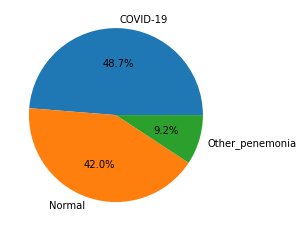

In [58]:
plt.pie(x=mini_df['label_group'].value_counts(),labels=mini_df['label_group'].unique(),autopct='%1.1f%%')

In [59]:
mini_df['label_group'].unique()

array(['COVID-19', 'Normal', 'Other_penemonia'], dtype=object)

In [60]:
X_ray_image_names=mini_df['X_ray_image_name'].values

In [61]:
images=[]
dir_path='../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
for im_name in X_ray_image_names:
    im_path=os.path.join(dir_path,im_name)
    img=load_img(im_path,target_size=(224,224))
    img=img_to_array(img)
    images.append(img)
images[:2]

[array([[[13., 13., 13.],
         [15., 15., 15.],
         [14., 14., 14.],
         ...,
         [18., 18., 18.],
         [18., 18., 18.],
         [14., 14., 14.]],
 
        [[ 0.,  0.,  0.],
         [ 2.,  2.,  2.],
         [ 0.,  0.,  0.],
         ...,
         [ 5.,  5.,  5.],
         [ 5.,  5.,  5.],
         [ 1.,  1.,  1.]],
 
        [[ 0.,  0.,  0.],
         [ 3.,  3.,  3.],
         [ 3.,  3.,  3.],
         ...,
         [ 6.,  6.,  6.],
         [ 5.,  5.,  5.],
         [ 1.,  1.,  1.]],
 
        ...,
 
        [[ 0.,  0.,  0.],
         [ 3.,  3.,  3.],
         [ 3.,  3.,  3.],
         ...,
         [37., 37., 37.],
         [31., 31., 31.],
         [ 3.,  3.,  3.]],
 
        [[ 0.,  0.,  0.],
         [ 4.,  4.,  4.],
         [ 3.,  3.,  3.],
         ...,
         [37., 37., 37.],
         [30., 30., 30.],
         [ 2.,  2.,  2.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [12., 12., 12.],
  

In [62]:
images=np.array(images)

In [63]:
images=images / 255

In [64]:
images.shape

(119, 224, 224, 3)

In [65]:
y.shape

(5286, 3)

In [66]:
mini_y_df=mini_df[['COVID-19','Normal','Other_penemonia']]
mini_y=mini_y_df.values
mini_y=mini_y.astype(int)
mini_y[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [67]:
cnn=Sequential([
    Conv2D(32,activation='relu',kernel_size=(3,3),padding='same',input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    Conv2D(64,activation='relu',kernel_size=(3,3),padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    Conv2D(128,activation='relu',kernel_size=(3,3),padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    Conv2D(64,activation='relu',kernel_size=(3,3),padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    Flatten(),
    Dense(3,activation='softmax')
])

2022-08-30 02:46:14.628637: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 02:46:14.780339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 02:46:14.781255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 02:46:14.783170: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [68]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
cnn.fit(images,mini_y,verbose=2,epochs=10,batch_size=10)

2022-08-30 02:46:17.974590: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-08-30 02:46:19.427128: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


12/12 - 10s - loss: 8.4661 - accuracy: 0.5210
Epoch 2/10
12/12 - 1s - loss: 0.5100 - accuracy: 0.8571
Epoch 3/10
12/12 - 1s - loss: 0.2891 - accuracy: 0.9244
Epoch 4/10
12/12 - 1s - loss: 0.1102 - accuracy: 0.9580
Epoch 5/10
12/12 - 1s - loss: 0.0637 - accuracy: 0.9748
Epoch 6/10
12/12 - 1s - loss: 0.1293 - accuracy: 0.9412
Epoch 7/10
12/12 - 1s - loss: 0.1014 - accuracy: 0.9580
Epoch 8/10
12/12 - 1s - loss: 0.1537 - accuracy: 0.9580
Epoch 9/10
12/12 - 1s - loss: 0.0697 - accuracy: 0.9664
Epoch 10/10
12/12 - 1s - loss: 0.1414 - accuracy: 0.9748


In [70]:
y_pred=cnn.predict(images)

In [71]:
y[5237:5260]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [72]:
y_pred[5237:5260]

array([], shape=(0, 3), dtype=float32)